In [1]:
import sys
from pathlib import Path

# Ruta a la carpeta raíz del proyecto
BASE_DIR = Path(r"D:\Python\spotify_rock")  # ajusta si tu ruta es otra
SRC_DIR = BASE_DIR / "src"

# Añadir src al sys.path
if str(SRC_DIR) not in sys.path:
    sys.path.insert(0, str(SRC_DIR))

import pandas as pd
from data.loading import load_spotify_raw

df = load_spotify_raw()
print(df.shape)
df.head()

(20718, 28)


,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [2]:
df.info()
df.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

Description         876
Stream              576
Comments            569
Likes               541
Channel             470
Views               470
Title               470
Url_youtube         470
official_video      470
Licensed            470
Energy                2
Key                   2
Danceability          2
Loudness              2
Tempo                 2
Duration_ms           2
Instrumentalness      2
Acousticness          2
Liveness              2
Speechiness           2
Valence               2
Album_type            0
Uri                   0
Album                 0
Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
dtype: int64

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20718.0,1.035850e+04,5.980916e+03,0.000000,5.179250e+03,1.035850e+04,1.553775e+04,2.071700e+04
Danceability,20716.0,6.197775e-01,1.652724e-01,0.000000,5.180000e-01,6.370000e-01,7.402500e-01,9.750000e-01
Energy,20716.0,6.352503e-01,2.141468e-01,0.000020,5.070000e-01,6.660000e-01,7.980000e-01,1.000000e+00
Key,20716.0,5.300348e+00,3.576449e+00,0.000000,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
Loudness,20716.0,-7.671680e+00,4.632749e+00,-46.251000,-8.858000e+00,-6.536000e+00,-4.931000e+00,9.200000e-01
Speechiness,20716.0,9.645601e-02,1.119600e-01,0.000000,3.570000e-02,5.050000e-02,1.030000e-01,9.640000e-01
Acousticness,20716.0,2.915353e-01,2.862988e-01,0.000001,4.520000e-02,1.930000e-01,4.772500e-01,9.960000e-01
Instrumentalness,20716.0,5.596156e-02,1.932620e-01,0.000000,0.000000e+00,2.405000e-06,4.630000e-04,1.000000e+00
Liveness,20716.0,1.935210e-01,1.685309e-01,0.014500,9.410000e-02,1.250000e-01,2.370000e-01,1.000000e+00
Valence,20716.0,5.298533e-01,2.454408e-01,0.000000,3.390000e-01,5.370000e-01,7.262500e-01,9.930000e-01


In [4]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set()

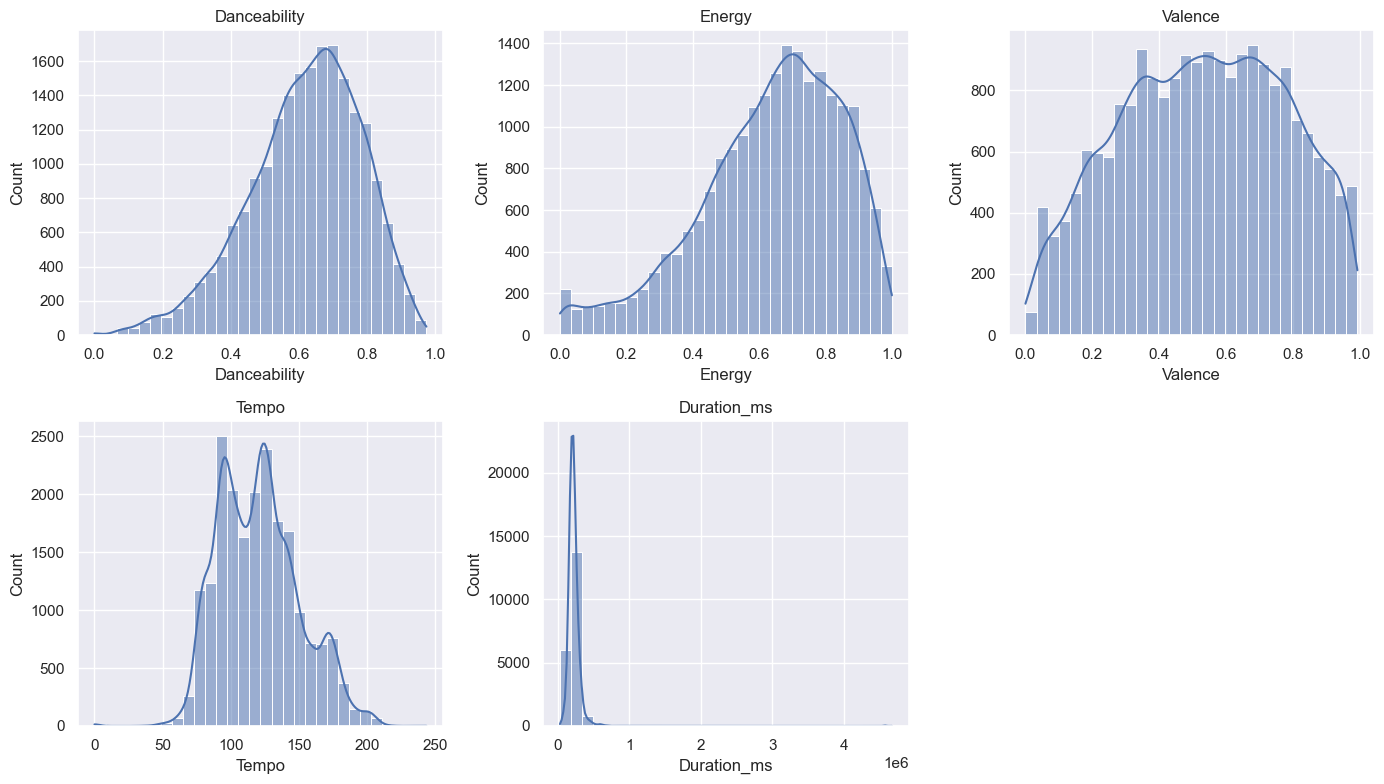

In [6]:
features = ["Danceability", "Energy", "Valence", "Tempo", "Duration_ms"]

plt.figure(figsize=(14, 8))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

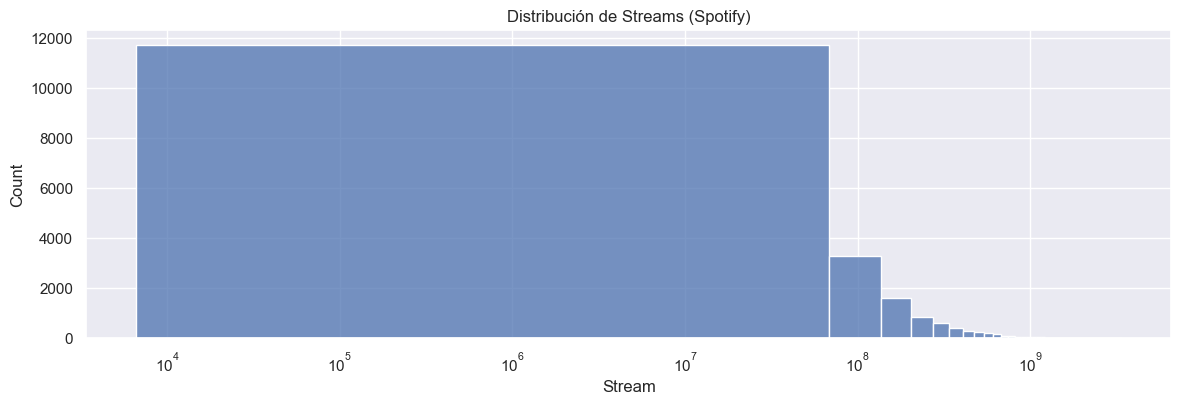

In [7]:
plt.figure(figsize=(14, 4))
sns.histplot(df["Stream"], bins=50)
plt.title("Distribución de Streams (Spotify)")
plt.xscale("log")  # porque hay valores muy grandes
plt.show()

In [8]:
# Top 20 artistas con más canciones en el dataset
df["Artist"].value_counts().head(20)

Artist
SICK LEGEND              10
Gorillaz                 10
Red Hot Chili Peppers    10
50 Cent                  10
Metallica                10
Coldplay                 10
Daft Punk                10
Linkin Park              10
Radiohead                10
AC/DC                    10
Black Eyed Peas          10
Michael Jackson          10
P!nk                     10
Eminem                   10
Pharrell Williams        10
Silk Sonic               10
INTERWORLD               10
Eden Muñoz               10
BoyWithUke               10
PinkPantheress           10
Name: count, dtype: int64

In [9]:
# Ejemplos de canciones por un artista concreto
df[df["Artist"] == "Gorillaz"][["Artist", "Track", "Danceability", "Energy", "Valence", "Tempo"]].head(10)

,Artist,Track,Danceability,Energy,Valence,Tempo
0,Gorillaz,Feel Good Inc.,0.818,0.705,0.772,138.559
1,Gorillaz,Rhinestone Eyes,0.676,0.703,0.852,92.761
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,0.551,108.014
3,Gorillaz,On Melancholy Hill,0.689,0.739,0.578,120.423
4,Gorillaz,Clint Eastwood,0.663,0.694,0.525,167.953
5,Gorillaz,DARE,0.760,0.891,0.966,120.264
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,0.716,0.897,0.358,127.030
7,Gorillaz,She's My Collar (feat. Kali Uchis),0.726,0.815,0.462,140.158
8,Gorillaz,Cracker Island (feat. Thundercat),0.741,0.913,0.643,120.012
9,Gorillaz,Dirty Harry,0.625,0.877,0.865,192.296


In [10]:
rock_artists = [
    "Red Hot Chili Peppers",
    "Metallica",
    "Linkin Park",
    "Radiohead",
    "AC/DC",
    "Gorillaz",
]

df_rock = df[df["Artist"].isin(rock_artists)].copy()
df_no_rock = df[~df["Artist"].isin(rock_artists)].copy()

df_rock.shape, df_no_rock.shape

((60, 28), (20658, 28))

In [11]:
audio_cols = ["Danceability", "Energy", "Valence", "Tempo", "Duration_ms"]

rock_stats = df_rock[audio_cols].describe().T
no_rock_stats = df_no_rock[audio_cols].describe().T

rock_stats, no_rock_stats

(              count           mean           std         min           25%  \
 Danceability   60.0       0.545500      0.124286       0.255       0.46100   
 Energy         60.0       0.773800      0.199719       0.229       0.70275   
 Valence        60.0       0.472633      0.222976       0.104       0.28575   
 Tempo          60.0     119.331067     26.529179      73.543      99.96450   
 Duration_ms    60.0  263631.116667  67085.430283  157333.000  215029.25000   
 
                       50%           75%         max  
 Danceability       0.5430       0.62425       0.818  
 Energy             0.8470       0.91300       0.996  
 Valence            0.4710       0.60450       0.966  
 Tempo            120.0655     135.23450     192.296  
 Duration_ms   255380.0000  302723.25000  515387.000  ,
                 count           mean            std          min  \
 Danceability  20656.0       0.619993       0.165330      0.00000   
 Energy        20656.0       0.634848       0.214061   

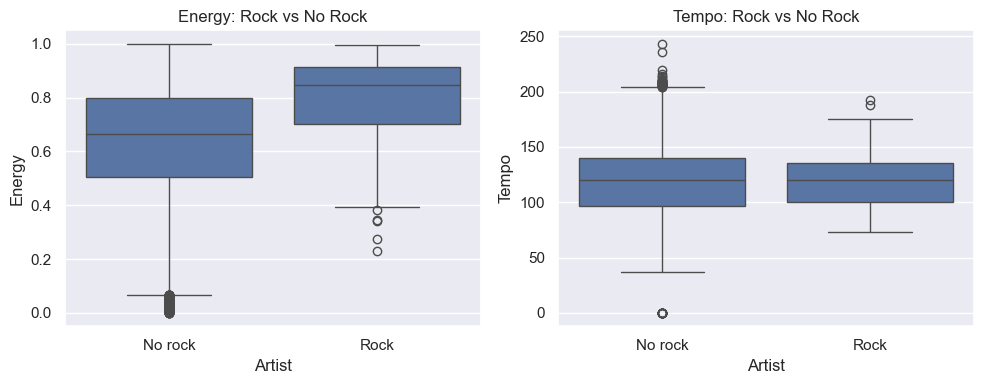

In [12]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x=df["Artist"].isin(rock_artists), y="Energy")
plt.xticks([0, 1], ["No rock", "Rock"])
plt.title("Energy: Rock vs No Rock")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x=df["Artist"].isin(rock_artists), y="Tempo")
plt.xticks([0, 1], ["No rock", "Rock"])
plt.title("Tempo: Rock vs No Rock")

plt.tight_layout()
plt.show()

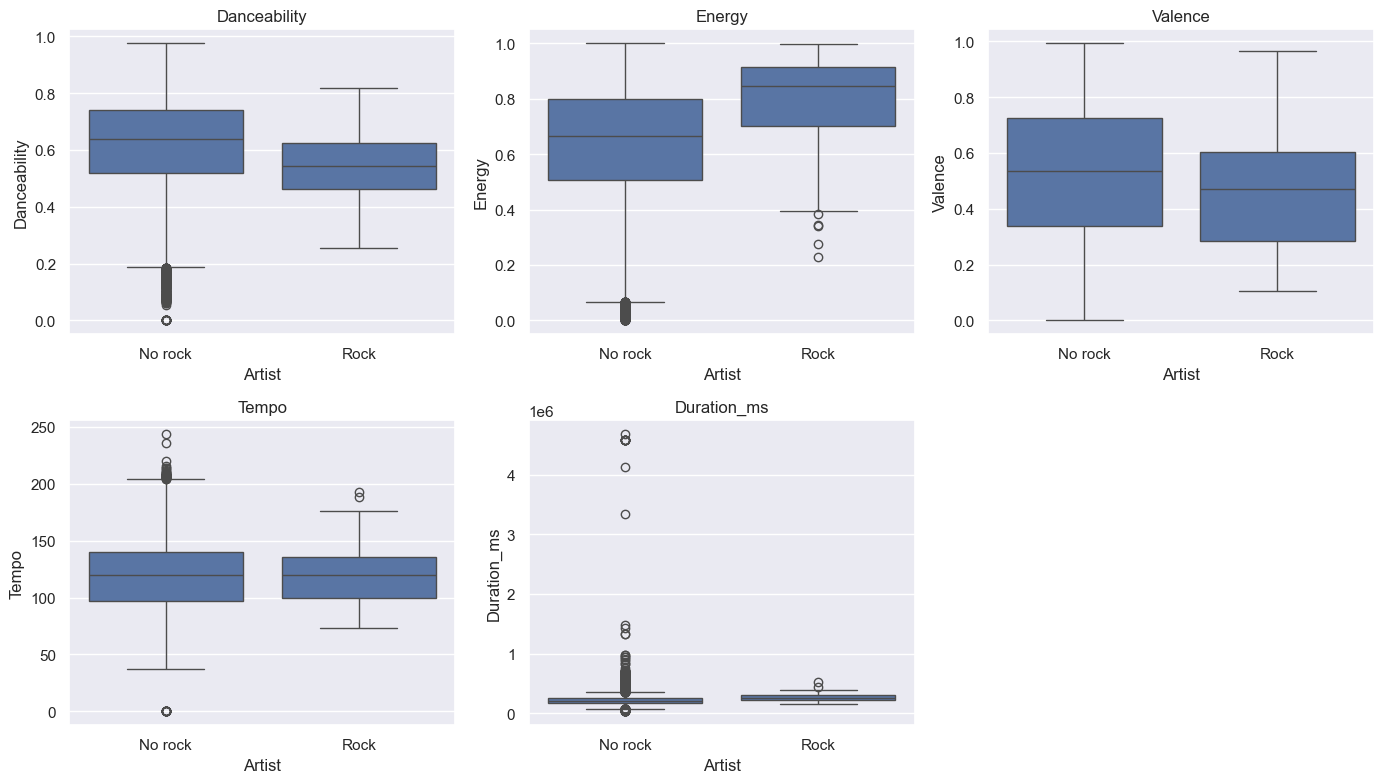

In [13]:
audio_cols = ["Danceability", "Energy", "Valence", "Tempo", "Duration_ms"]

plt.figure(figsize=(14, 8))
for i, col in enumerate(audio_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        data=df,
        x=df["Artist"].isin(rock_artists),
        y=col,
    )
    plt.xticks([0, 1], ["No rock", "Rock"])
    plt.title(col)
plt.tight_layout()
plt.show()


In [14]:
from analysis.rock_features import (
    DEFAULT_ROCK_ARTISTS,
    split_rock_nonrock,
    audio_stats_by_group,
)
from viz.plots_rock import boxplots_audio_rock_vs_nonrock

df_rock, df_no_rock = split_rock_nonrock(df)
rock_stats, no_rock_stats = audio_stats_by_group(df_rock, df_no_rock)

rock_stats, no_rock_stats

(              count           mean           std         min           25%  \
 Danceability   60.0       0.545500      0.124286       0.255       0.46100   
 Energy         60.0       0.773800      0.199719       0.229       0.70275   
 Valence        60.0       0.472633      0.222976       0.104       0.28575   
 Tempo          60.0     119.331067     26.529179      73.543      99.96450   
 Duration_ms    60.0  263631.116667  67085.430283  157333.000  215029.25000   
 
                       50%           75%         max  
 Danceability       0.5430       0.62425       0.818  
 Energy             0.8470       0.91300       0.996  
 Valence            0.4710       0.60450       0.966  
 Tempo            120.0655     135.23450     192.296  
 Duration_ms   255380.0000  302723.25000  515387.000  ,
                 count           mean            std          min  \
 Danceability  20656.0       0.619993       0.165330      0.00000   
 Energy        20656.0       0.634848       0.214061   

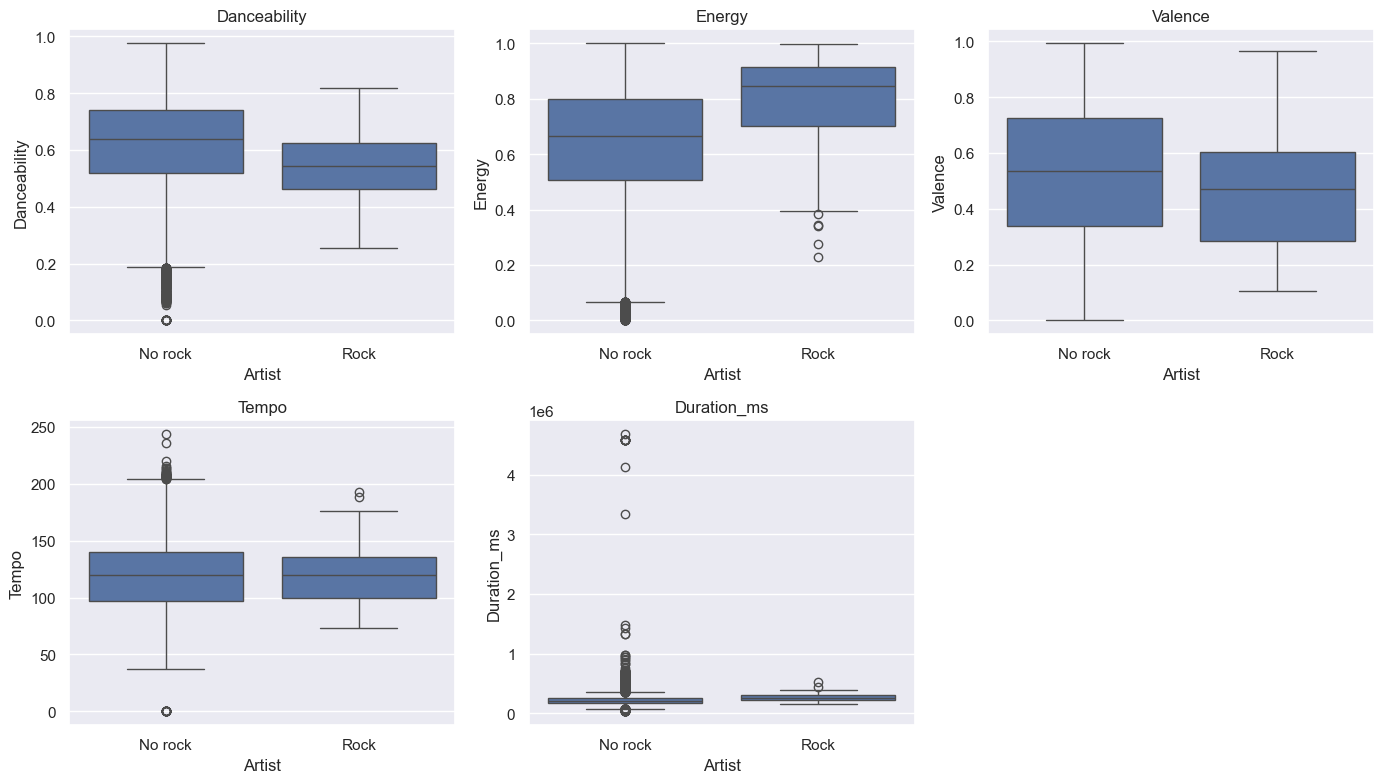

In [15]:
boxplots_audio_rock_vs_nonrock(
    df=df,
    rock_artists=DEFAULT_ROCK_ARTISTS,
)

In [16]:
from analysis.eda_general import (
    summarize_nulls,
    numeric_describe,
    top_artists_by_streams,
    top_tracks_by_streams,
)

In [17]:
nulls = summarize_nulls(df)
nulls.head(15)

Description       876
Stream            576
Comments          569
Likes             541
Channel           470
Views             470
Title             470
Url_youtube       470
official_video    470
Licensed          470
Energy              2
Key                 2
Danceability        2
Loudness            2
Tempo               2
dtype: int64

In [18]:
numeric_stats = numeric_describe(df)
numeric_stats

,count,mean,std,min,25%,50%,75%,max
Danceability,20716.0,6.197775e-01,1.652724e-01,0.00000,5.180000e-01,6.370000e-01,7.402500e-01,9.750000e-01
Energy,20716.0,6.352503e-01,2.141468e-01,0.00002,5.070000e-01,6.660000e-01,7.980000e-01,1.000000e+00
Valence,20716.0,5.298533e-01,2.454408e-01,0.00000,3.390000e-01,5.370000e-01,7.262500e-01,9.930000e-01
Tempo,20716.0,1.206383e+02,2.957902e+01,0.00000,9.700200e+01,1.199650e+02,1.399350e+02,2.433720e+02
Duration_ms,20716.0,2.247176e+05,1.247905e+05,30985.00000,1.800095e+05,2.132845e+05,2.524430e+05,4.676058e+06
Stream,20142.0,1.359422e+08,2.441321e+08,6574.00000,1.767486e+07,4.968298e+07,1.383581e+08,3.386520e+09


In [19]:
top_artists = top_artists_by_streams(df, n=15)
top_artists

,Artist,Stream
1497,Post Malone,1.525126e+10
526,Ed Sheeran,1.439488e+10
507,Dua Lipa,1.340808e+10
2000,XXXTENTACION,1.322435e+10
1861,The Weeknd,1.303197e+10
927,Justin Bieber,1.209777e+10
777,Imagine Dragons,1.185831e+10
381,Coldplay,1.177848e+10
982,Khalid,1.138684e+10
267,Bruno Mars,1.089786e+10


In [20]:
top_tracks = top_tracks_by_streams(df, n=15)
top_tracks

,Artist,Track,Album,Stream
15250,The Weeknd,Blinding Lights,After Hours,3.386520e+09
12452,Ed Sheeran,Shape of You,÷ (Deluxe),3.362005e+09
19186,Lewis Capaldi,Someone You Loved,Divinely Uninspired To A Hellish Extent,2.634013e+09
17937,Post Malone,rockstar (feat. 21 Savage),beerbongs & bentleys,2.594927e+09
17938,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,Hollywood's Bleeding,2.538330e+09
17445,Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,Hollywood's Bleeding,2.538330e+09
13503,Drake,One Dance,Views,2.522432e+09
16028,Halsey,Closer,Closer,2.456205e+09
16099,The Chainsmokers,Closer,Closer,2.456205e+09
14030,Imagine Dragons,Believer,Evolve,2.369272e+09


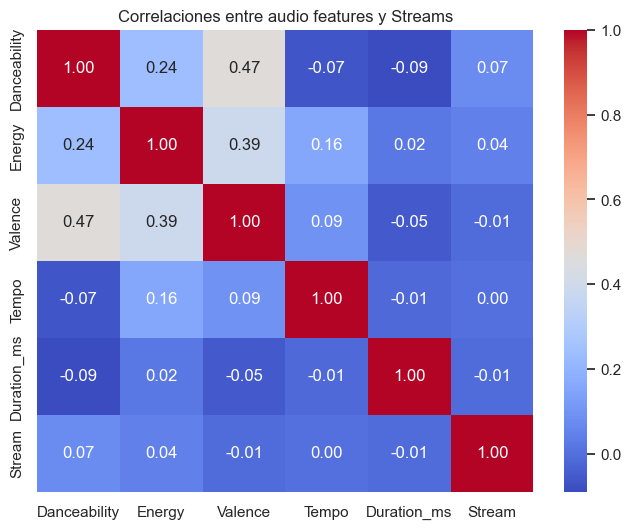

In [25]:
corr_cols = ["Danceability", "Energy", "Valence", "Tempo", "Duration_ms", "Stream"]
corr = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre audio features y Streams")
plt.show()

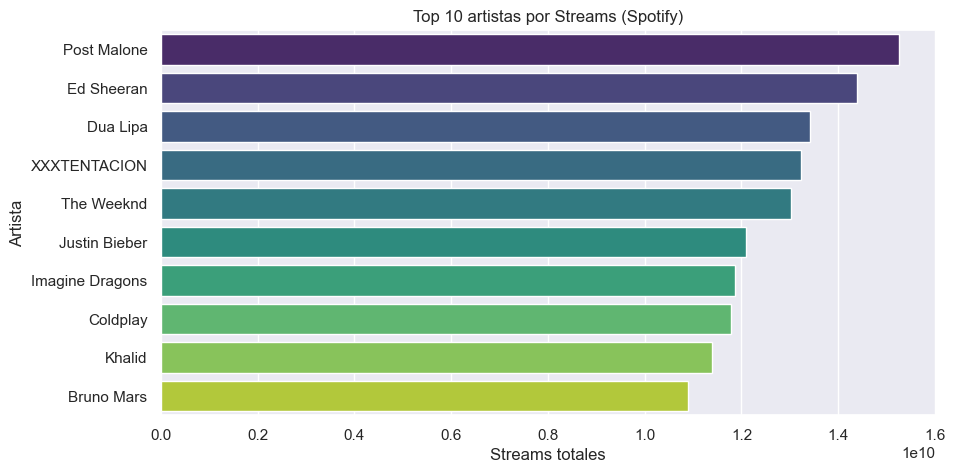

In [26]:
top_artists = top_artists_by_streams(df, n=10)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_artists,
    x="Stream",
    y="Artist",
    hue="Artist",
    palette="viridis",
    legend=False,
)
plt.title("Top 10 artistas por Streams (Spotify)")
plt.xlabel("Streams totales")
plt.ylabel("Artista")
plt.show()

In [27]:
from analysis.rock_features import DEFAULT_ROCK_ARTISTS

df["is_rock"] = df["Artist"].isin(DEFAULT_ROCK_ARTISTS)
df["is_rock"].value_counts()

is_rock
False    20658
True        60
Name: count, dtype: int64

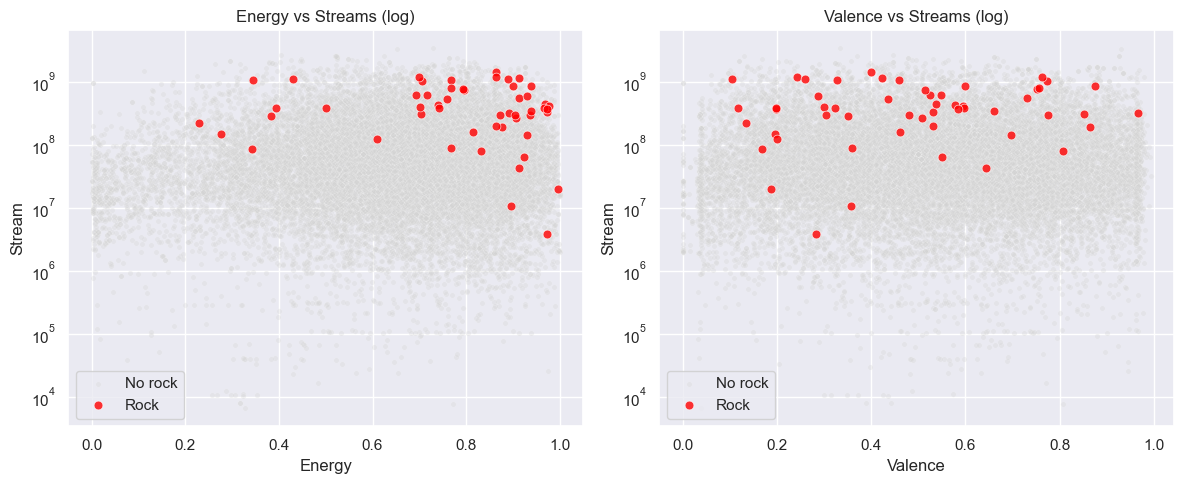

In [31]:
plt.figure(figsize=(12, 5))

# Energy vs Streams
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df[df["is_rock"] == False],
    x="Energy",
    y="Stream",
    color="lightgray",
    alpha=0.3,
    s=15,
    label="No rock",
)
sns.scatterplot(
    data=df[df["is_rock"] == True],
    x="Energy",
    y="Stream",
    color="red",
    alpha=0.8,
    s=40,
    label="Rock",
)
plt.yscale("log")
plt.title("Energy vs Streams (log)")
plt.legend()

# Valence vs Streams
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df[df["is_rock"] == False],
    x="Valence",
    y="Stream",
    color="lightgray",
    alpha=0.3,
    s=15,
    label="No rock",
)
sns.scatterplot(
    data=df[df["is_rock"] == True],
    x="Valence",
    y="Stream",
    color="red",
    alpha=0.8,
    s=40,
    label="Rock",
)
plt.yscale("log")
plt.title("Valence vs Streams (log)")
plt.legend()

plt.tight_layout()
plt.show()